In [32]:
# p.333
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# %matplotlib inline 
# #???

In [33]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값은 반환하는 함수
def true_fun(x):
    return np.cos(1.5*np.pi*x)
#x값 생성( 0~1사이 값 30개 랜덤추출)
np.random.seed(0)
n_samples= 30
x= np.sort(np.random.rand(n_samples))

#y 값 생성( true_fun에서 노이즈 변동 값 더한 값)

y= true_fun(x)+ np.random.randn(n_samples)*.1


Degree 1의 회귀계수는 [-1.61]입니다
Degree 1의 MSE는 0.40772896250986845입니다

Degree 4의 회귀계수는 [  0.47 -17.79  23.59  -7.26]입니다
Degree 4의 MSE는 0.0432087498723175입니다

Degree 15의 회귀계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08]입니다
Degree 15의 MSE는 182493841.86921898입니다


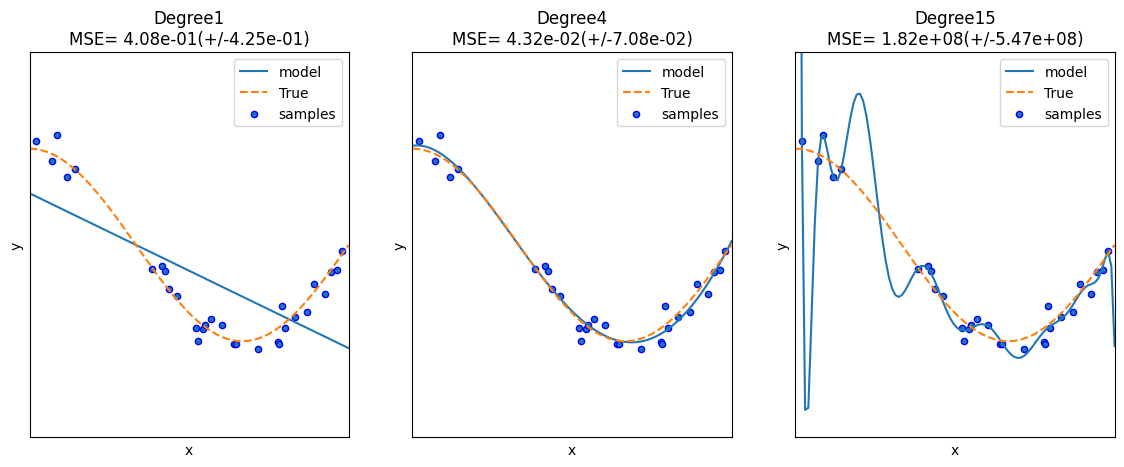

In [34]:
plt.figure(figsize=(14,5))
degrees= [1,4,15]

# 차수를 변화시키변서 비교
for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(),yticks=() )  #여러 ax그래프 한번에 설정

    #차수별로 polynomial 변환
    # 각 모델 인스턴스 생성
    polynomial_Features= PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_Regression=LinearRegression()
    # 파이프라인으로 묶기
    pipeline= Pipeline([('polynomial_Features', polynomial_Features), ('linear_Regression', linear_Regression)])
    pipeline.fit(x.reshape(-1,1), y)

    #교차검증으로 평가
    scores= cross_val_score(pipeline, x.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    #데이터를 10개로 나눠서 테스트, 검증을 바꿔가면서 검증
    # 회귀계수 추출
    coefficients= pipeline.named_steps['linear_Regression'].coef_
    print(f'\nDegree {degrees[i]}의 회귀계수는 {np.round(coefficients, 2)}입니다')
    print(f'Degree {degrees[i]}의 MSE는 {-1*np.mean(scores)}입니다')

    # 예측 곡석과 실제 곡선 비교 (테스트 데이터 100개를 통해)
    X_test= np.linspace(0,1, 100)
    # 예측
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='model')
    # 실제 (함수 적용값)
    plt.plot(X_test, true_fun(X_test), '--', label='True')
    plt.scatter(x, y, edgecolors='b', s=20, label='samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title(f'Degree{degrees[i]}\nMSE= {-scores.mean():.2e}(+/-{scores.std():.2e})')

plt.show()